### Steps :
- load dir
- iterate and load the array images
-  

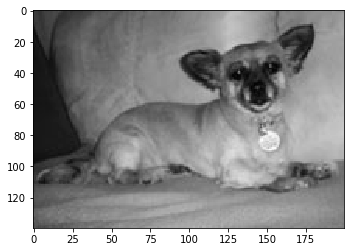

In [1]:
%matplotlib inline
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR = 'data/'
CATEGORIES = ['Dog', 'Cat']


for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [2]:
print(img_array.shape)

(140, 200)


[]

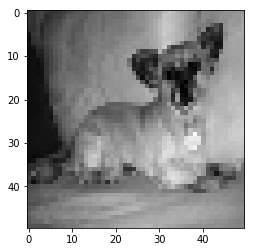

In [3]:
# normalize size of img
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.plot()

In [4]:
# create training datset
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        clas_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, clas_num])
            except Exception as e:
                pass
        
create_training_data()

In [5]:
print(len(training_data))

24946


In [6]:
# shuffle the data

import random 

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
1
0
1
0
0


In [8]:
X = []
y = []


for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   # 1 ==> grayscale


In [9]:
import pickle


pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_in = open('y.pickle', 'wb')
pickle.dump(y, pickle_in)
pickle_in.close()

In [10]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [11]:
X[1]

array([[[158],
        [113],
        [111],
        ...,
        [165],
        [162],
        [159]],

       [[149],
        [124],
        [121],
        ...,
        [166],
        [164],
        [161]],

       [[138],
        [127],
        [133],
        ...,
        [168],
        [164],
        [161]],

       ...,

       [[143],
        [146],
        [150],
        ...,
        [ 70],
        [ 77],
        [128]],

       [[143],
        [145],
        [147],
        ...,
        [ 58],
        [ 77],
        [132]],

       [[139],
        [141],
        [143],
        ...,
        [ 69],
        [ 87],
        [134]]], dtype=uint8)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [15]:
# limit VRAM on GPU for multiple training
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

# dense_layers = [0, 1, 2]
# layer_sizes = [32, 64, 128]
# conv_layers = [1, 2, 3]

# dense_layers = [2]
# layer_sizes = [128]
# conv_layers = [1]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=20,
                      validation_split=0.3,
                      callbacks=[tensorboard])

1-conv-128-nodes-2-dense-1552980942
Instructions for updating:
Colocations handled automatically by placer.
Train on 17462 samples, validate on 7484 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
17462/17462 [==============================] - 23s 1ms/sample - loss: 0.6137 - acc: 0.6601 - val_loss: 0.5570 - val_acc: 0.7171
Epoch 2/20
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.5211 - acc: 0.7429 - val_loss: 0.5177 - val_acc: 0.7467
Epoch 3/20
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.4500 - acc: 0.7850 - val_loss: 0.5413 - val_acc: 0.7227
Epoch 4/20
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.3780 - acc: 0.8276 - val_loss: 0.5519 - val_acc: 0.7449
Epoch 5/20
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.2779 - acc: 0.8799 - val_loss: 0.6433 - val_acc: 0.7416
Epoch 6/20
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.1806 - acc: 0.928

In [4]:
model.save('cat_dog.model')

Dogs


[]

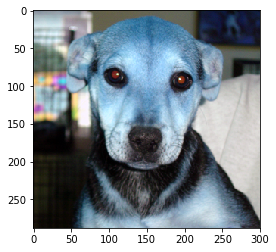

In [13]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt


CATEGORIES = ['Dogs', 'Cats']

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

im = 'dog.jpg'
model = tf.keras.models.load_model('cat_dog.model')

PREDICTION = model.predict([prepare(im)])
print(CATEGORIES[int(PREDICTION[0][0])])

im_array = cv2.imread(im, cv2.IMREAD_COLOR)
plt.imshow(im_array)
plt.plot()

Cats


[]

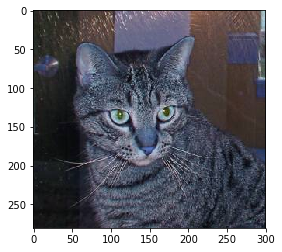

In [14]:
image = 'cat.jpg'
PREDICTION = model.predict([prepare(image)])
print(CATEGORIES[int(PREDICTION[0][0])])

im_array = cv2.imread(image, cv2.IMREAD_COLOR)
plt.imshow(im_array)
plt.plot()

In [10]:
import time
import numpy as np
import pandas as pd

dense_layers = [0, 1, 2, 3, 4, 5]
layer_sizes = [8, 16, 32, 64, 128, 256]
rec_layers = [1, 2, 3, 4, 5, 6]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for rec_layer in rec_layers:
            NAME = "{}-rec-{}-nodes-{}-rec-{}".format(rec_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

1-rec-8-nodes-0-rec-1554347123
2-rec-8-nodes-0-rec-1554347123
3-rec-8-nodes-0-rec-1554347123
4-rec-8-nodes-0-rec-1554347123
5-rec-8-nodes-0-rec-1554347123
6-rec-8-nodes-0-rec-1554347123
1-rec-16-nodes-0-rec-1554347123
2-rec-16-nodes-0-rec-1554347123
3-rec-16-nodes-0-rec-1554347123
4-rec-16-nodes-0-rec-1554347123
5-rec-16-nodes-0-rec-1554347123
6-rec-16-nodes-0-rec-1554347123
1-rec-32-nodes-0-rec-1554347123
2-rec-32-nodes-0-rec-1554347123
3-rec-32-nodes-0-rec-1554347123
4-rec-32-nodes-0-rec-1554347123
5-rec-32-nodes-0-rec-1554347123
6-rec-32-nodes-0-rec-1554347123
1-rec-64-nodes-0-rec-1554347123
2-rec-64-nodes-0-rec-1554347123
3-rec-64-nodes-0-rec-1554347123
4-rec-64-nodes-0-rec-1554347123
5-rec-64-nodes-0-rec-1554347123
6-rec-64-nodes-0-rec-1554347123
1-rec-128-nodes-0-rec-1554347123
2-rec-128-nodes-0-rec-1554347123
3-rec-128-nodes-0-rec-1554347123
4-rec-128-nodes-0-rec-1554347123
5-rec-128-nodes-0-rec-1554347123
6-rec-128-nodes-0-rec-1554347123
1-rec-256-nodes-0-rec-1554347123
2-rec-2